In [28]:
import pandas as pd
from pathlib import Path

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot

In [41]:
plot_path = "/afs/desy.de/user/a/axelheim/private/run_realTree_separator/"

nfs_path = "/nfs/dust/belle2/user/axelheim/BranchSeparator/run_realTree_separator/"


data_name = "50k_realTree_IDs"
#"50k_realTree_clean"


# '50k_realTree_IDs_charge'
# "50k_realTree_charge"

In [42]:
writer_dir = Path((nfs_path + 'tb_logs/' + data_name))
writer_dir.mkdir(parents=True, exist_ok=True)

csv_dir = Path((nfs_path + 'tb_csv/' + data_name))
csv_dir.mkdir(parents=True, exist_ok=True)

plot_path = Path((plot_path + 'plots/' + data_name))
plot_path.mkdir(parents=True, exist_ok=True)

tb_metrics = tabulate_metrics(writer_dir, csv_dir)

Converting run events.out.tfevents.1620415589.batchg004.desy.de.247322.0

- Done


In [43]:
len(tb_metrics)

1

In [44]:
one_run = tb_metrics[0]

print("Number of rows/epochs: ", len(one_run))
one_run

Number of rows/epochs:  120


,time_stamp,Epoch,Cross Entropy/Training,Accuracy/Training,PerfectSA/Training,SA1F/Training,SA2F/Training,SA3F/Training,SAbad/Training,Cross Entropy/Validation,Accuracy/Validation,PerfectSA/Validation,SA1F/Validation,SA2F/Validation,SA3F/Validation,SAbad/Validation
0,1.620416e+09,1,0.438077,0.787197,0.056646,0.196425,0.265937,0.229322,0.251669,0.440478,0.786609,0.051883,0.204327,0.253606,0.242788,0.247396
1,1.620416e+09,2,0.455924,0.792455,0.079527,0.215144,0.242054,0.203459,0.259816,0.457323,0.791400,0.076923,0.213341,0.243990,0.202524,0.263221
2,1.620416e+09,3,0.502590,0.786720,0.030271,0.191640,0.288016,0.252983,0.237090,0.505005,0.785390,0.032051,0.184896,0.284856,0.256210,0.241987
3,1.620416e+09,4,0.418409,0.811139,0.050859,0.261240,0.284144,0.228098,0.175659,0.423242,0.809228,0.048077,0.264423,0.275040,0.225160,0.187300
4,1.620416e+09,5,0.326347,0.839029,0.144854,0.279536,0.255297,0.185786,0.134526,0.329695,0.837991,0.144030,0.283454,0.243990,0.190505,0.138021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.620422e+09,116,0.943320,0.657415,0.012309,0.056290,0.116631,0.170873,0.643897,0.951837,0.654531,0.011018,0.055088,0.114183,0.160657,0.659054
116,1.620422e+09,117,0.876610,0.678092,0.014801,0.075588,0.144565,0.184339,0.580707,0.886099,0.675831,0.013021,0.074720,0.144832,0.185096,0.582332
117,1.620422e+09,118,0.830428,0.691471,0.023705,0.092726,0.151086,0.184785,0.547699,0.838974,0.689019,0.021034,0.090345,0.149639,0.179688,0.559295
118,1.620422e+09,119,0.890102,0.666637,0.011374,0.058249,0.124844,0.183204,0.622329,0.901622,0.663111,0.009415,0.056490,0.118790,0.184896,0.630409


In [45]:
one_run['PerfectSA/Validation'] + one_run['SA1F/Validation'] + one_run['SA2F/Validation'] + one_run['SA3F/Validation'] + one_run['SAbad/Validation'] 

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
115    1.0
116    1.0
117    1.0
118    1.0
119    1.0
Length: 120, dtype: float64

In [46]:
epochs = one_run['Epoch']
loss_tr = one_run['Cross Entropy/Training']
loss_val = one_run['Cross Entropy/Validation']



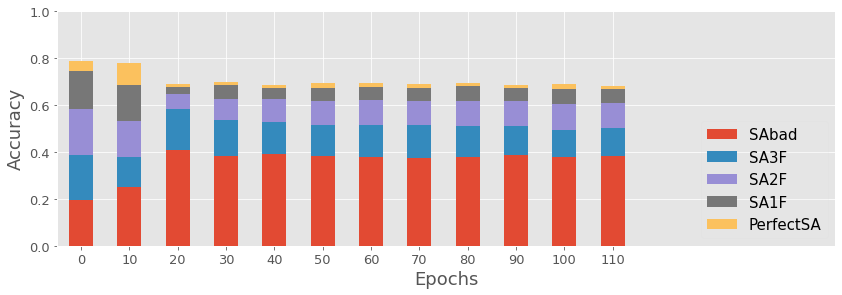

In [47]:
multi_metric_bar_plot(one_run, plot_path, ('barplot_metrics_' + data_name), data_type="Validation", step=10, metric_type="SA")

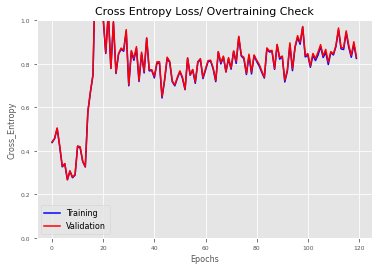

In [48]:
curve_plot(loss_tr, loss_val, plot_path, ('loss_comparison_' + data_name), 'Cross_Entropy', 'Cross Entropy Loss/ Overtraining Check')

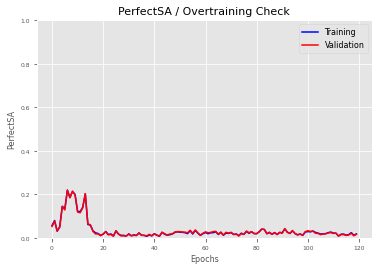

In [49]:
pLCA_tr = one_run['PerfectSA/Training']
pLCA_val = one_run['PerfectSA/Validation']


curve_plot(pLCA_tr, pLCA_val, plot_path, ('perfectSA_comparison_' + data_name), 'PerfectSA', 'PerfectSA / Overtraining Check')